
🧑🏻‍💻 В компании SkyCrossroads запущена рекламная акция:

Клиент может получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода.

Классическая акция подразумевает получение дополнительных 1000 баллов лояльности за покупку от 100 рублей. 

Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку от 100 рублей. 

Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point. Также в датасете есть информация о том, как долго клиент зарегистрирован у нас в программе лояльности.

Вам поступил запрос от отдела маркетинга:

- Рассчитать результаты эксперимента в целом и в отдельности по каждой торговой точке
- Вынести решение об эффективности воздействия Б по сравнению с воздействием А
- Сделать сегментацию пользователей с точки зрения длительности регистрации в программе лояльности
</aside>


- **Расшифровка данных**
    
    **id_client** - уникальный id клиента
    
    **id_group** - контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)
    
    **sum_pay** - сумма, на которую была совершена покупка
    
    **id_point** - id торговой точки
    
    **months_reg** - длительность регистрации клиента в программе лояльности
      

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import  ttest_ind, mannwhitneyu
from scipy.stats import  norm
from matplotlib import pyplot as plt


### Задача 1

Постройте в Python функцию **statistical_analysis**, которая будет проводить анализ выборки. 

**На вход она берет:**

- один ряд ***r*** в формате «список» (*list*) или «кортеж» (*tuple*). Это ряд, который необходимо исследовать.
- один ряд ***q*** в формате «список» (*list*). Это ряд квантильных порогов, для которых необходимо вычислить квантильные 
    значения ряда ***r***. Аргумент ***q*** должен иметь значение по умолчанию *q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]* 
    (но при желании значение ряда ***q*** можно было бы заменить)

**И делает следующие шаги:**

1. Проводит проверку на тип данных ряда : если тип данных ряда ***r*** не «список» (*list*) или «кортеж» (*tuple*), 
    то выводит ошибку «Нужен список или кортеж!»  
2. Проводит проверку на длину ряда ***r***: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более 
    длинный ряд».
3. Проводит преобразование типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*).
4. Для ряда выводит (с помощью *print* и расшифровки) среднее (метод Series “*mean*”), дисперсию (метод Series “*var*”), 
    стандартное отклонение (метод Series “*std*”).
    
    Также записывает эти значения во внутренние переменные и возвращает эти переменные в *return*.
    
5. С помощью функции *quantile* из библиотеки *numpy* функция рассчитывает и записывает в отдельную переменную ***qs*** 
    список из квантилей, соответствующих квантильным порогам из ***q***. 
    
    Можно прочитать документацию функции *quantile:* [https://numpy.org/doc/stable/reference/generated/numpy.quantile.html]
        (https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)
    
    Ряд ***qs*** также должен быть в return функции (вместе со средним, дисперсией и стандартным отклонением из пункта-4).
    
6. Оформляет принт результатов квантильного анализа. Для этого необходимо проверить, есть ли среди указанных в аргументе 
    квантильных порогов те, что соответствуют ***медиане***, ***квартилям*** или ***децилям***. Если такие квантильные 
    пороги есть, то для каждого из них оформите print с указанием квантильного порога и его значения.
7. Для ряда функция **statistical_analysis** строит гистограмму с помощью библиотеки *seaborn*.

In [2]:
def statistical_analysis (r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):

    if (type(r) is not list) & (type(r) is not tuple):
        print ('Нужен список или кортеж!')
        return
    
    if len(r) <= 4:
        print("Требуется более длинный ряд")
        return
    
    r=pd.Series(r)
    
    m = r.mean()
    v = r.var()
    s = r.std()
    
    print ('Среднее ряда = ', m)
    print ('Дисперсия ряда = ', v)
    print ('Стандартное отклонение ряда = ', s)
    print ()
    
    qs = np.quantile(r, q)
    
    for i in range(len(q)):
        if q[i]==0.5:
            print('Медиана = ', qs[i])
        elif q[i]==0.25:
            print('Первый квартиль = ', qs[i])
        elif q[i]==0.75:
            print('Третий квартиль = ', qs[i])
        elif q[i]*100%10==0:
            print('Дециль', qs[i]*10, ' = ', qs[i])
        else:
            print('Квантиль ', qs[i], ' = ', qs[i])   
            
    sns.histplot(data = r)
       
    return m, v, s, qs

   

### Задача 2

Постройте в Python функцию ***test_calc***, которая будет проводить t-тест на равенство средних двух выборок. 

**На вход она берет:**

- Ряд 1 (***r1***)
- Ряд 2 (***r2***)
- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

**И делает следующие шаги:**

1. Вычисляет значение *t-критерия* и его *p_value* по сравнению средних значений рядов ***r1*** и ***r2.*** 
    Лучше всего воспользоваться функцией *ttest_ind* из библиотеки *scipy.stats.* Эти значения сохраняются во внутренние 
    переменные (значение t-критерия в переменную ***s,*** p_value в переменную ***p***).
2. Возвращает (*return*) переменные ***s*** и ***p***.
3. Оформляет принт результатов, принимается ли нулевая гипотеза о равенстве средних или нет на основании сравнения 
    полученного *p_value* (переменная ***р***) и аргумента ***alpha.***

In [3]:
def test_calc (r1, r2, alpha=0.05):
    
    s, p = ttest_ind(r1, r2)
    
    if p< alpha:
        print ('Гипотеза не подтверждается: средние не равны')
        print ('Разница средних = ', r1.mean()-r2.mean())
    else: 
        print ('Гипотеза не подтверждается: средние равны')
        print ('Разница средних = 0')
        
    return s, p

### Задача 3

Постройте в Python функцию **mann_whitney_func**, которая будет проводить тест Манна-Уитни для двух выборок.

**На вход она берет:**

- Ряд 1 (***r1***)
- Ряд 2 (***r2***)
- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

**И делает следующие шаги:**

1. Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. 
    Значение статистики записывается во внутреннюю переменную ***s***, а *p_value* - во внутреннюю переменную ***p***.
2. Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
3. Возвращает (в *return*) — внутренние переменные ***s*** и ***p***.

In [4]:
def mann_whitney_func (r1, r2, alpha=0.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения НЕ равны')
    else: 
        print ('Распределения равны')
        
    return s, p

In [5]:
df=pd.read_csv('Dataset_AB_TEST.csv', sep=';')
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [6]:
df.describe()

,id_client,sum_pay,id_point,months_reg
count,1.097600e+04,10849.000000,10895.000000,10976.000000
mean,1.373018e+06,3568.751037,1180.040385,4.717566
std,1.477359e+04,2927.164583,4.345107,3.185566
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361744e+06,1251.000000,1178.000000,2.000000
50%,1.370690e+06,3173.000000,1179.000000,4.000000
75%,1.373433e+06,5358.000000,1179.000000,7.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [7]:
df.groupby('id_group').count()

,id_client,sum_pay,id_point,months_reg
id_group,,,,
control,5202,5175,5198,5202
test,5700,5673,5696,5700


In [8]:
len(df[df['id_group'].isnull()])

74

In [9]:
len(df[df['sum_pay'].isnull()])

127

In [10]:
len(df[df['id_point'].isnull()])

81

In [11]:
df=df[(~df['id_group'].isnull())&(~df['sum_pay'].isnull())&(~df['id_point'].isnull())]

Среднее ряда =  3568.7580258302582
Дисперсия ряда =  8568932.941996625
Стандартное отклонение ряда =  2927.27397795229

Дециль 4100.0  =  410.0
Первый квартиль =  1250.75
Дециль 15900.0  =  1590.0
Дециль 23296.000000000004  =  2329.6000000000004
Медиана =  3173.5
Дециль 39340.0  =  3934.0
Третий квартиль =  5356.5
Дециль 70882.0  =  7088.200000000001
Квантиль  7805.0999999999985  =  7805.0999999999985
Квантиль  8453.64  =  8453.64
Квантиль  9043.659999999998  =  9043.659999999998
Квантиль  9809.76000000001  =  9809.76000000001
Квантиль  21046.075000000004  =  21046.075000000004


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([  410.   ,  1250.75 ,  1590.   ,  2329.6  ,  3173.5  ,  3934.   ,
         5356.5  ,  7088.2  ,  7805.1  ,  8453.64 ,  9043.66 ,  9809.76 ,
        21046.075]))

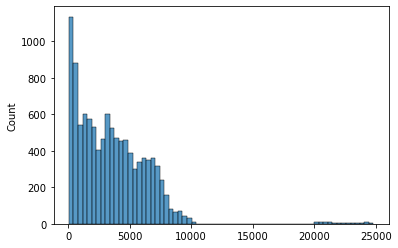

In [12]:
statistical_analysis (tuple(df['sum_pay']), q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9,0.95,0.97,.98,0.99,0.995])

In [13]:
df=df[df['sum_pay']<20000]

In [14]:
df_A = df[df['id_group']=='control']
df_B = df[df['id_group']=='test']

In [15]:
def show_hist (r1, r2, graph_title, xlabel='Размер платежа', ylabel='Кол-во людей'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax1=sns.histplot(r1, color='blue')
    ax2=sns.histplot(r2, color='orange')
    ax1.set(xlabel=xlabel, ylabel=ylabel)
    plt.title(graph_title)
    plt.show()

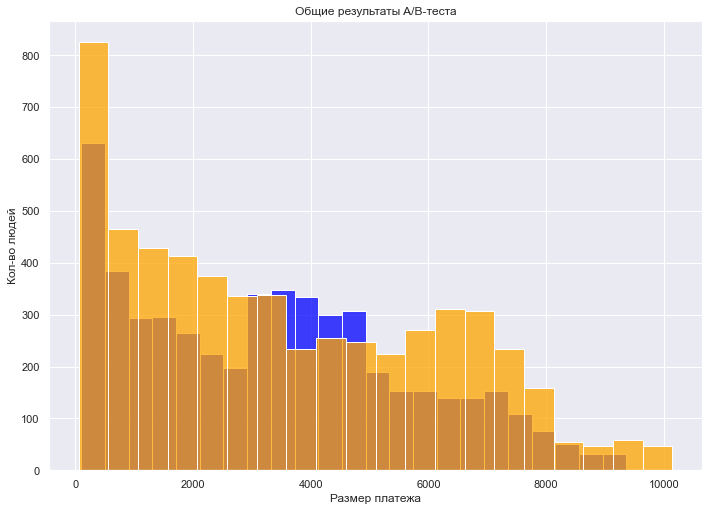

In [16]:
show_hist(df_A['sum_pay'], df_B['sum_pay'], 'Общие результаты A/B-теста')

In [17]:
mann_whitney_func(df_A['sum_pay'], df_B['sum_pay'])

Распределения равны


(14141330.5, 0.05842125879702285)

In [18]:
test_calc(df_A['sum_pay'], df_B['sum_pay'])

Гипотеза не подтверждается: средние не равны
Разница средних =  -175.82591504758784


(-3.7141912292177888, 0.0002048855494553075)

Анализ точки  1199.0


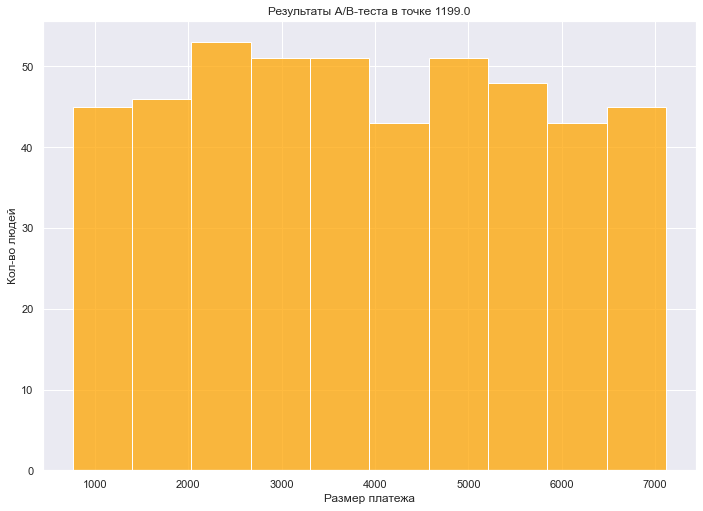

Анализ точки  1182.0


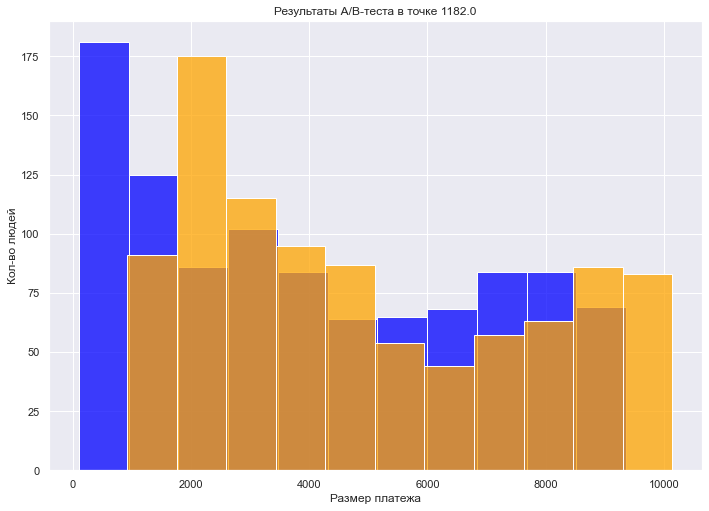

Гипотеза не подтверждается: средние не равны
Разница средних =  -908.1867859371746

Распределения НЕ равны


Анализ точки  1178.0


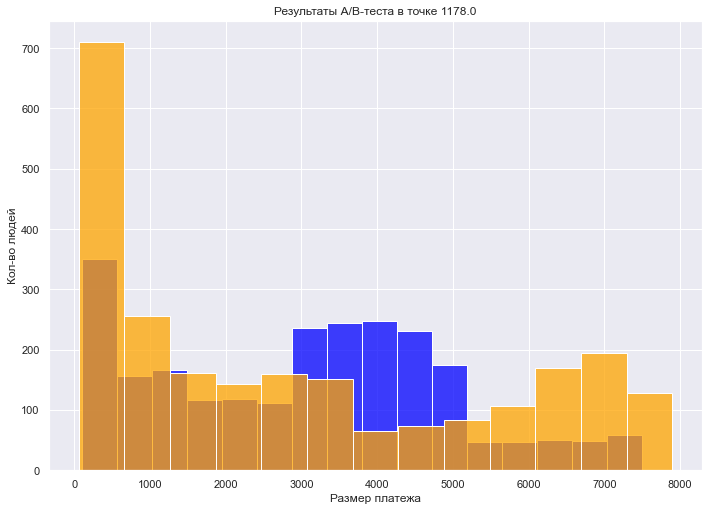

Гипотеза не подтверждается: средние равны
Разница средних = 0

Распределения НЕ равны


Анализ точки  1179.0


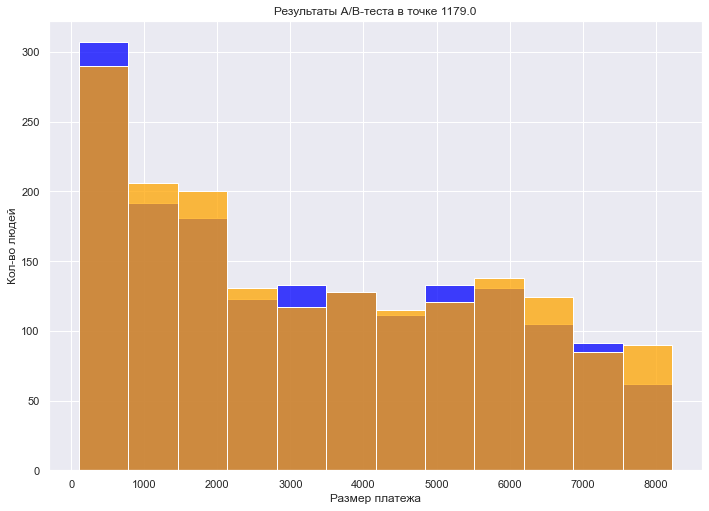

Гипотеза не подтверждается: средние равны
Разница средних = 0

Распределения равны


Анализ точки  1186.0


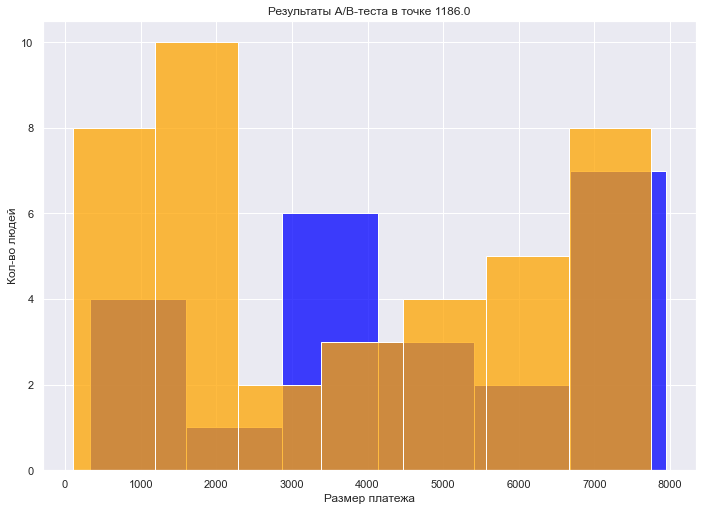

Гипотеза не подтверждается: средние равны
Разница средних = 0

Распределения равны


Анализ точки  1188.0


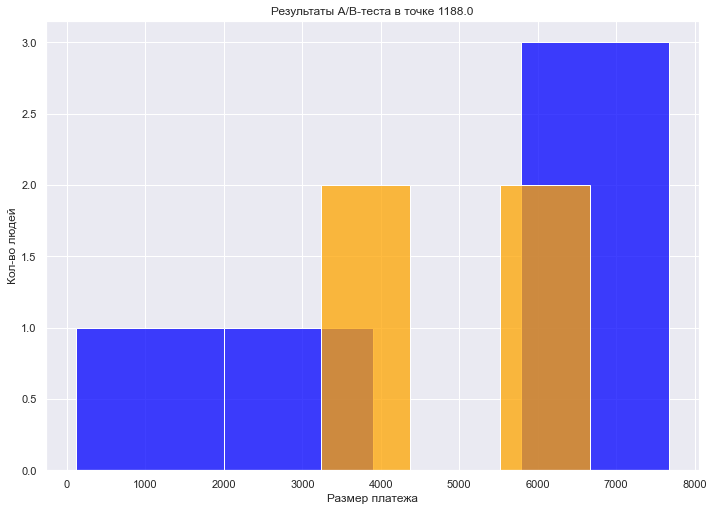

Гипотеза не подтверждается: средние равны
Разница средних = 0

Распределения равны




In [19]:
for i in df.id_point.unique():
    print('Анализ точки ', i)
    df_loc_A = df_A[df_A['id_point']==i]
    df_loc_B = df_B[df_B['id_point']==i]
    
    title_loc = 'Результаты А/В-теста в точке ' + str(i)
    
    show_hist(df_loc_A['sum_pay'], df_loc_B['sum_pay'], title_loc)
    if len(df_loc_A['sum_pay'].values)>0 and len(df_loc_B['sum_pay'].values)>0:
        test_calc(df_loc_A['sum_pay'], df_loc_B['sum_pay'])
        print()
        mann_whitney_func(df_loc_A['sum_pay'], df_loc_B['sum_pay'])
        print()
        print()

In [20]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

C:\Users\Anna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Кореляция размера платежа и длительности жизни клиента')

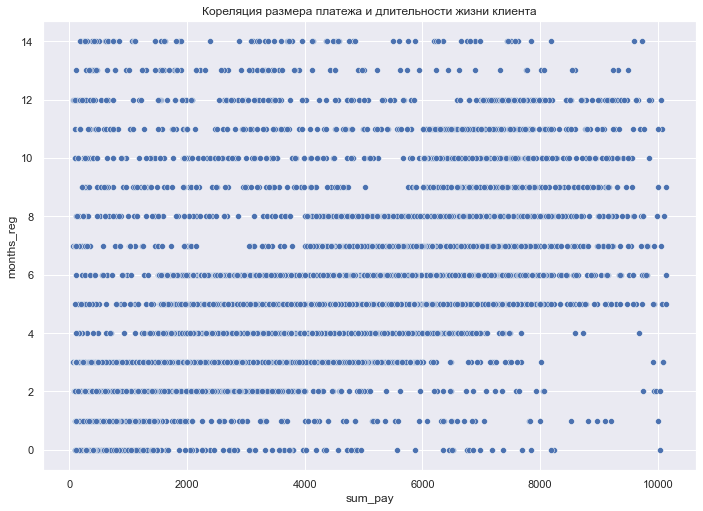

In [21]:
sns.scatterplot(df['sum_pay'], df['months_reg']).set_title('Кореляция размера платежа и длительности жизни клиента')

In [22]:
print('Pearson', pearsonr(df['sum_pay'], df['months_reg']))
print('Spearman', spearmanr(df['sum_pay'], df['months_reg']))

Pearson (0.598276252133036, 0.0)
Spearman SpearmanrResult(correlation=0.6520008575703581, pvalue=0.0)
